In [2]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import csv
import re
import pandas as pd
import nltk
import seaborn as sns
from collections import Counter
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
import operator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

urlweb = "https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_characteranimation.htm"
page = requests.get(urlweb)
soup = BeautifulSoup(page.content, "html.parser")

[nltk_data] Downloading package punkt to /home2/htnv73/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home2/htnv73/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Question 1 Please design and implement the solution to crawl all the unique URLs for the detailed publication pages

In [3]:
# crawl all the unique URLs for each topic
urls = []
urls.append(urlweb)
Topics = soup.find("p",class_='TextOption') 
for Link in Topics. find_all("a"): 
    url = urlweb[:urlweb.rfind("/")+1]+Link["href"]
    urls.append(url)
    topic = Link.get_text()
    print(topic,url) #print the topic and url

Motion Analysis https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_motionanalysis.htm
Interaction Modelling https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_interactionmodelling.htm
3D Reconstruction https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_3dreconstruction.htm
Action Recognition https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_actionrecognition.htm
Surface Modelling https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_surfacemodelling.htm
Virtual Reality https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_virtualreality.htm
Biometrics https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_biometrics.htm
Face Modelling https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_facemodelling.htm
Crowd Modelling https://community.dur.ac.uk/hubert.shum/comp42315/publicationfull_year_crowdmodelling.htm
Biomedical Engineering https://

In [4]:
#Crawl each publication url from the links above and delete the duplicate urls
publications=[]
Filters = []
for url in urls:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    spanTitles = soup.find_all("span",class_="TextSmallDefault")
    for spanTitle in spanTitles:
        a = spanTitle.find("a",class_="LinkButton")
        if a!= None:
            publication =urlweb[:urlweb.rfind("/")+1]+ a["href"]
            publications.append(publication)
            for publication in publications:
                if not publication in Filters: #delete the duplicate urls
                    print(publication)
                    Filters.append(publication)
                

https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tvcg2021motionsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_tcsvt2021motionprediction.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cag2021reactivemotion.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_cavw2019emotionanalysis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_mig2019dancesynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_ace2017dancedj3d.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_d2at2017emotionsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_siggraph2016dancegeneration.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_hhm2016depthsensor.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2015latticemodel.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_casa2014variationsynthesis.htm
https://community.dur.ac.uk/hubert.shum/comp42315/pbl_pg2013topologyik.htm
https://community.dur.ac.uk/hubert

Question 2 Please design and implement the solution to crawl all the text-based information of each
publication from the website, to convert such information into a suitable data format, and to
store it in a data file.

In [5]:
#build a csv file to store the data and set column names
fields=["Title","Abstract","Authors","Year","Type","Journal/Booktitle","Volume","Num_Pages","Publisher","DOI","ISSN","Citation","Impact_Factor"]
with open('Text.csv', 'a+', encoding='utf-8_sig', newline='') as file:
        csv_writer = csv.writer(file)
        csv_writer.writerow(fields)

#crawl the text from each publication page(try and except to determining whether a target exists) 
for url in Filters:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    publication = soup.find_all('p', attrs={'class': 'TextSmallDefault'})[1] #Avoid duplicate crawling of information in References 
    publication2 = soup.find_all('p', attrs={'class': 'TextSmallDefault'})[0] #and choose the right format according to needs
    
    #Title
    title = soup.find('h1').text
    print('title: ', title)
    
    #Abstract
    abstract = soup.find('p').text
    print('abstract: ', abstract)
    
    #Author(BibTex is more clear than Endnote)
    try:
        rauthor = publication2.find(text = re.compile('author='))#regular language
        formats = re.findall('author={(.+)}',rauthor)#clean the data,removal of unnecessary punctuation
        author = formats[0]
    except IndexError:
        author = ' '
    print('author: ', author)
    
    #Year
    try:
        year = re.findall('PY(.*?)<', str(publication))[0].strip().replace(' ', '').replace('-', '')#regular language and clean the data
    except IndexError:
        year = ' '
    print('year: ', year)
    
    #Type
    try:
        ty=re.findall('TY(.*?)<', str(publication))[0].strip().replace(' ', '').replace('-', '')#same above
    except IndexError:
        ty = ' '
    print('type: ', ty)
    
    #Journal/Booktitle(based on different type, the article may from journal or book, but they are all T2 in EndNote)
    try:
        journal = re.findall('T2(.*?)<', str(publication))[0].strip().replace(' ', '').replace('-', '')
    except IndexError:
        journal = ' '
    print('journal/booktitle: ', journal)
    
    #Volume
    try:
        vol = re.findall('VL(.*?)<', str(publication))[0].strip().replace(' ', '').replace('-', '')
    except IndexError:
        vol = ' '
    print('volume: ', vol)
    
    #Number od Pages(Like Author above)
    try:
        fnumpage = publication2.find(text = re.compile('numpages='))
        formats2 = re.findall('numpages={(.+)}',fnumpage)
        numpage = formats2[0]
    except TypeError:
        numpage = ' '
    print('number of pages: ', numpage)
    
    #Publisher
    try:
        pb = re.findall('PB(.*?)<', str(publication))[0].strip().replace(' ', '').replace('-', '')
    except IndexError:
        pb = ' '
    print('publisher: ', pb)
    
    #DOI
    try:
        do = re.findall('DO(.*?)<', str(publication))[0].strip().replace(' ', '').replace('-', '')
    except IndexError:
        do = ' '
    print('DOI: ', do)
    
    #ISSN
    try:
        sn = re.findall('SN(.*?)<', str(publication))[0].strip().replace(' ', '').replace('-', '')
    except IndexError:
        sn = ' '
    print('ISSN: ', sn)
    
    #Citation
    try:
        citation = re.findall('Citation: (.*?)<', str(page.text))[0]
    except IndexError:
        citation = '0'
    print('citation: ', citation)
    
    #Impact Factor
    try:
        impact_factor = re.findall('Impact Factor: (.*?)<', str(page.text))[0]
    except IndexError:
        impact_factor = '0'
    print('Impact Factor: ', impact_factor)

    print("——————————————————————————————————————")

    row = [title, abstract,author, year, ty, journal, vol, numpage, pb, do, sn, citation, impact_factor]
    
    #write the data above to the csv file
    with open('Text.csv','a+') as file:
        csv_writer = csv.writer(file)
        csv_writer.writerow(row)
    
print("Data Successfully Inserted:")

title:  Spatio-temporal Manifold Learning for Human Motions via Long-horizon Modeling
abstract:  Data-driven modeling of human motions is ubiquitous in computer graphics and computer vision applications, such as synthesizing realistic motions or recognizing actions. Recent research has shown that such problems can be approached by learning a natural motion manifold using deep learning on a large amount data, to address the shortcomings of traditional data-driven approaches. However, previous deep learning methods can be sub-optimal for two reasons. First, the skeletal information has not been fully utilized for feature extraction. Unlike images, it is difficult to define spatial proximity in skeletal motions in the way that deep networks can be applied for feature extraction. Second, motion is time-series data with strong multi-modal temporal correlations between frames. On the one hand, a frame could be followed by several candidate frames leading to different motions; on the other ha

publisher:   
DOI:   
ISSN:   
citation:  3
Impact Factor:  0
——————————————————————————————————————
title:  Automatic Dance Generation System Considering Sign Language Information
abstract:  In recent years, thanks to the development of 3DCG animation editing tools (e.g. MikuMikuDance), a lot of 3D character dance animation movies are created by amateur users. However, it is very difficult to create choreography from scratch without any technical knowledge. Shiratori et al. [2006] produced the dance automatic generation system considering rhythm and intensity of dance motions. However, each segment is selected randomly from database, so the generated dance motion has no linguistic or emotional meanings. Takano et al. [2010] produced a human motion generation system considering motion labels. However, they use simple motion labels like 'running' or 'jump', so they cannot generate motions that express emotions. In reality, professional dancers make choreography based on music features o

title:  Simulating Multiple Character Interactions with Collaborative and Adversarial Goals
abstract:  This paper proposes a new methodology for synthesizing animations of multiple characters, allowing them to intelligently compete with one another in dense environments, while still satisfying requirements set by an animator. To achieve these two conflicting objectives simultaneously, our method separately evaluates the competition and collaboration of the interactions, integrating the scores to select an action that maximizes both criteria. We extend the idea of min-max search, normally used for strategic games such as chess. Using our method, animators can efficiently produce scenes of dense character interactions such as those in collective sports or martial arts. The method is especially effective for producing animations along story lines, where the characters must follow multiple objectives, while still accommodating geometric and kinematic constraints from the environment.
autho

title:  Generating Realistic Fighting Scenes by Game Tree
abstract:  Recently, there have been a lot of researches to synthesize/edit the motion of a single avatar in the virtual environment. However, there has not been so much work of simulating continuous interactions of multiple avatars such as fighting. In this paper, we propose a new method to generate a realistic fighting scene based on motion capture data. We propose a new algorithm called the temporal expansion approach which maps the continuous time action plan to a discrete causality space such that turn-based evaluation methods can be used. As a result, it is possible to use many mature algorithms available in strategy games such as the Minimax algorithm and α-β pruning. We also propose a method to generate and use an offense/defense table, which illustrates the spatialtemporal relationship of attacks and dodges, to incorporate tactical maneuvers of defense into the scene. Using our method, avatars will plan their strategies

title:  Automatic Musculoskeletal and Neurological Disorder Diagnosis with Relative Joint Displacement from Human Gait
abstract:  Musculoskeletal and neurological disorders are common devastating companions of ageing, leading to a reduction in quality of life and increased mortality. Gait analysis is a popular method for diagnosing these disorders. However, manually analysing the motion data is a labour-intensive task, and the quality of the results depends on the experience of the doctors. In this paper, we propose an automatic framework for classifying musculoskeletal and neurological disorders among older people based on 3D motion data. We also propose two new features to capture the relationship between joints across frames, known as 3D Relative Joint Displacement (3DRJDP) and 6D Symmetric Relative Joint Displacement (6DSymRJDP), such that relative movement between joints can be analyzed. To optimize the classification performance, we adapt feature selection methods to choose an op

title:  Inverse Dynamics Based on Occlusion-resistant Kinect Data: Is It Usable for Ergonomics?
abstract:  Joint torques and forces are relevant quantities to estimate the biomechanical constraints of working tasks in ergonomics. However, inverse dynamics requires accurate motion capture data, which are generally not available in real manufacturing plants. Markerless and calibrationless measurement systems based on depth cameras, such as the Microsoft Kinect, are promising means to measure 3D poses in real time. Recent works have proposed methods to obtain reliable continuous skeleton data in cluttered environments, with occlusions and inappropriate sensor placement. In this paper, we evaluate the reliability of an inverse dynamics method based on this corrected skeleton data and its potential use to estimate joint torques and forces in such cluttered environments. To this end, we compared the calculated joint torques with those obtained with a reference inverse dynamics method based o

title:  A Two-Stream Recurrent Network for Skeleton-Based Human Interaction Recognition
abstract:  This paper addresses the problem of recognizing human-human interaction from skeletal sequences. Existing works are mainly designed to classify single human action. Many of them simply stack the movement features of two characters to deal with human interaction, while neglecting the abundant relationships between characters. In this paper, we propose a novel two-stream recurrent neural network by adopting the geometric features from both single actions and interactions to describe the spatial correlations with different discriminative abilities. The first stream is constructed under pairwise joint distance (PJD) in a fully-connected mesh to categorize the interactions with explicit distance patterns. To better distinguish similar interactions, in the second stream, we combine PJD with the spatial features from individual joint positions using graph convolutions to detect the implicit corr

title:  Kinect Posture Reconstruction based on a Local Mixture of Gaussian Process Models
abstract:  Depth sensor based 3D human motion estimation hardware such as Kinect has made interactive applications more popular recently. However, it is still challenging to accurately recognize postures from a single depth camera due to the inherently noisy data derived from depth images and self-occluding action performed by the user. In this paper, we propose a new real-time probabilistic framework to enhance the accuracy of live captured postures that belong to one of the action classes in the database. We adopt the Gaussian Process model as a prior to leverage the position data obtained from Kinect and marker-based motion capture system. We also incorporate a temporal consistency term into the optimization framework to constrain the velocity variations between successive frames. To ensure that the reconstructed posture resembles the accurate parts of the observed posture, we embed a set of jo

title:  CCESK: A Chinese Character Educational System Based on Kinect
abstract:  In this paper, a Chinese character educational system based on Kinect is proposed for guiding beginners to learn the basics of Chinese characters in a more intuitive way. It extracts 19 common components, denoted as alphabets, from Chinese characters. 19 postures were designed according to the shapes of these alphabets. Instead of memorizing Chinese characters through repetitive copying, students can first associate an alphabet with the corresponding designed posture. Then they break down a Chinese character into a set of alphabets in order to perform the sequence of corresponding postures so that they can easily remember the whole character. Our proposed system contains 2 major functions: 1) the learning function that is responsible for delivering the courseware, and 2) the testing function that is used to let students acquire their learning progress through some tests. A rule-based algorithm is designed 

title:  Human Action Recognition via Skeletal and Depth based Feature Fusion
abstract:  This paper addresses the problem of recognizing human actions captured with depth cameras. Human action recognition is a challenging task as the articulated action data is high dimensional in both spatial and temporal domains. An effective approach to handle this complexity is to divide human body into different body parts according to human skeletal joint positions, and performs recognition based on these part-based feature descriptors. Since different types of features could share some similar hidden structures, and different actions may be well characterized by properties common to all features (sharable structure) and those specific to a feature (specific structure), we propose a joint group sparse regression-based learning method to model each action. Our method can mine the sharable and specific structures among its part-based multiple features meanwhile imposing the importance of these part-b

title:  STGAE: Spatial Temporal Graph Auto-encoder for Hand Motion Denoising
abstract:  Hand object interaction in mixed reality (MR) relies on the accurate tracking and estimation of human hands, which provide users with a sense of immersion. However, raw captured hand motion data always contains errors such as joints occlusion, dislocation, high-frequency noise, and involuntary jitter. Denoising and obtaining the hand motion data consistent with the user’s intention are of the utmost importance to enhance the interactive experience in MR. To this end, we propose an end-to-end method for hand motion denoising using the spatial-temporal graph auto-encoder (STGAE). The spatial and temporal patterns are recognized simultaneously by constructing the consecutive hand joint sequence as a spatial-temporal graph. Considering the complexity of the articulated hand structure, a simple yet effective partition strategy is proposed to model the physic-connected and symmetry-connected relationships

title:  Resolving Occlusion for 3D Object Manipulation with Hands in Mixed Reality
abstract:  Due to the need to interact with virtual objects, the hand-object interaction has become an important element in mixed reality (MR) applications. In this paper, we propose a novel approach to handle the occlusion of augmented 3D object manipulation with hands by exploiting the nature of hand poses combined with tracking-based and model-based methods, to achieve a complete mixed reality experience without necessities of heavy computations, complex manual segmentation processes or wearing special gloves. The experimental results show a frame rate faster than real-time and a great accuracy of rendered virtual appearances, and a user study verifies a more immersive experience compared to past approaches. We believe that the proposed method can improve a wide range of mixed reality applications that involve hand-object interactions.
author:  Feng, Qi and Shum, Hubert P. H. and Morishima, Shigeo
yea

title:  Triplet Loss with Channel Attention for Person Re-identification
abstract:  The triplet loss function has seen extensive use within person re-identification. Most works focus on either improving the mining algorithm or adding new terms to the loss function itself. Our work instead concentrates on two other core components of the triplet loss that have been under-researched. First, we improve the standard Euclidean distance with dynamic weights, which are selected based on the standard deviation of features across the batch. Second, we exploit channel attention via a squeeze and excitation unit in the backbone model to emphasise important features throughout all layers of the model. This ensures that the output feature vector is a better representation of the image, and is also more suitable to use within our dynamically weighted Euclidean distance function. We demonstrate that our alterations provide significant performance improvement across popular reidentification data sets,

title:  Semantics-STGCNN: A Semantics-guided Spatial Temporal Graph Convolutional Network for Multi-class Trajectory Prediction
abstract:  Predicting the movement trajectories of multiple classes of road users in real-world scenarios is a challenging task due to the diverse trajectory patterns. While recent works of pedestrian trajectory prediction successfully modelled the influence of surrounding neighbours based on the relative distances, they are ineffective on multi-class trajectory prediction. This is because they ignore the impact of the implicit correlations between different types of road users on the trajectory to be predicted - for example, a nearby pedestrian has a different level of influence from a nearby car. In this paper, we propose to introduce class information into a graph convolutional neural network to better predict the trajectory of an individual. We embed the class labels of the surrounding objects into the label adjacency matrix (LAM), which is combined with t

title:  Interactive Formation Control in Complex Environments
abstract:  The degrees of freedom of a crowd is much higher than that provided by a standard user input device.  Typically, crowd control systems require multiple passes to design crowd movements by specifying waypoints, and then defining character trajectories and crowd formation. Such multi-pass control would spoil the responsiveness and excitement of real-time control systems. In this paper, we propose a single-pass algorithm to control a crowd in complex environments. We observe that low level details in crowd movement are related to interactions between characters and the environment, such as diverging/merging at cross points, or climbing over obstacles. Therefore, we simplify the problem by representing the crowd with a deformable mesh, and allow the user, via multi-touch input, to specify high level movements and formations that are important for context delivery. To help prevent congestion, our system dynamically rea

title:  An Intelligent Mobile-Based Automatic Diagnostic System to Identify Retinal Diseases using Mathematical Morphological Operations
abstract:  Diabetic retinopathy is considered in terms of the presence of exudates which cause vision loss in the areas affected. This study targets the development of an intelligent mobile-based automatic diagnosis integrated with a microscopic lens to identify retinal diseases at initial stage at any time or place. Exudate detection is a significant step in order obtaining an early diagnosis of diabetic retinopathy, and if they are segmented accurately, laser treatment can be applied effectively. Consequently, precise segmentation is the fundamental step in exudate extraction. This paper proposes a technique for exudate segmentation in colour retinal images using morphological operations. In this method, after pre-processing, the optic disc and blood vessels are isolated from the retinal image. Exudates are then segmented by a combination of morphol

Impact Factor:  0
——————————————————————————————————————
title:  Towards Sparse Rule Base Generation for Fuzzy Rule Interpolation
abstract:  Fuzzy inference systems have been successfully applied to many real-world applications. Traditional fuzzy inference systems only applicable to problems with dense rule bases by which any observation can be covered; while fuzzy rule interpolation is also able to work with sparse rule bases which may not cover certain observations. Thanks to its ability to work with less rules, fuzzy rule interpolation approaches have also been utilised to reduce system complexity by removing those rules which can be approximated by their neighbouring ones for complex fuzzy models. A number of important fuzzy rule base generation approaches have been proposed in the literature, but the majority of these only target dense rule bases for traditional fuzzy inference systems. This paper proposes a novel sparse fuzzy rule base generation method to support FRI. The approa

Question 3 Please design and implement a solution to find out the 100 most popular words used for the title
and the abstract of the publications.

In [6]:
#Read the csv file to do the analysis
df = pd.read_csv("Text.csv", names=fields,
                 skiprows = 1, 
                  index_col=False)
#print(df)
#get target variables into list
Titles=df.Title.to_list()
Abstract=df.Abstract.to_list()
Authors=df.Authors.to_list()

In [7]:
#The"word" in this solution means one word
Text =''.join(Titles + Abstract) #change the list in to string
clean = re.sub(r"""
               [,.;@#?!&$]+  
               \ *           
               """,
               " ",          
               Text, flags=re.VERBOSE)#Using regular language to clean the punctuation
Text_process = clean.lower().split() #split the text into word

dic = {} #use dictionary function to count the frequency
for word in Text_process:
    if word not in dic:
        dic[word] = 1
    else:
        dic[word] = dic[word] + 1

swd = sorted(dic.items(),key=operator.itemgetter(1),reverse=True)#sort the data by value

stop_words = stopwords.words('english')#using NPL package to delete meaning less words
stop_words.extend(("also","two","due","one","however")) #based on the results above add more stop words
count = 1 #to show 100 word frequency 
print("The 100 most popular words are ")
for k,v in swd:
    if k not in stop_words and count<=100:
        print (k,v)
        count+=1

The 100 most popular words are 
motion 149
propose 106
system 102
method 99
using 98
data 85
proposed 73
learning 71
paper 71
human 68
features 68
results 67
new 66
applications 65
control 60
motions 53
hand 53
3d 52
based 52
different 51
characters 51
framework 49
network 47
methods 47
show 47
kinect 45
interactions 44
algorithm 44
information 42
approach 40
environment 40
rule 40
existing 40
images 39
body 38
depth 38
crowd 38
problem 38
work 37
graph 37
feature 37
applied 37
used 37
joint 36
facial 35
real-time 35
deep 35
games 35
movement 35
multiple 34
model 33
experimental 33
computer 33
performance 33
database 33
fuzzy 32
use 32
character 31
training 31
virtual 31
demonstrate 31
time 31
effectively 31
animation 30
interaction 30
shape 30
accuracy 30
user 30
movements 29
real 28
pose 28
local 28
dance 27
classification 27
analysis 27
posture 27
action 27
quality 27
systems 27
recognition 26
realistic 25
research 25
postures 25
captured 24
temporal 24
generate 24
objects 24
repres

Question 5 Please design and implement the solution to use data analysis and visualization for analysing
which authors collaborate (or appear) as co-authors in the publications.

In [8]:
Co_author ='/'.join(Authors) #change the list in to string
author_process = Co_author.replace(" and ","/") #replace 'and' by '/' to prepare for spliting
Author_process = author_process.split('/') #split all the names

dic2 = {} #count the name
for word in Author_process:
    if word not in dic2:
        dic2[word] = 1
    else:
        dic2[word] = dic2[word] + 1
swd2 = sorted(dic2.items(),key=operator.itemgetter(1),reverse=True) #sort by value

for k,v in swd2:
    if v > 1:
        print(k,v)

Shum, Hubert P. H. 110
Ho, Edmond S. L. 37
Komura, Taku 23
Aslam, Nauman 14
Leung, Howard 11
Morishima, Shigeo 11
Yang, Longzhi 10
Multon, Franck 8
Wang, He 7
Men, Qianhui 6
Plantard, Pierre 6
Hu, Shanfeng 6
Feng, Qi 6
Zhang, Jingtian 5
Shao, Ling 5
Li, Frederick W. B. 5
Liang, Xiaohui 5
Iwamoto, Naoya 4
Shen, Yijun 4
Yamazaki, Shuntaro 4
Rueangsirarak, Worasak 4
Organisciak, Daniel 4
Zhang, Lining 4
Chan, Jacky C. P. 3
Zhou, Liuyang 3
McCay, Kevin D. 3
Nozawa, Naoki 3
Takagi, Shu 3
Bhattacharjee, Debotosh 3
Henry, Joseph 3
Li, Jie 3
Yi, Li 2
Asahina, Wakana 2
Cheung, Yiu-ming 2
Yuen, P. C. 2
Hoyet, Ludovic 2
Kaewkaen, Kitchana 2
Liu, Zhiguang 2
Yang, Yang 2
Zeng, Lanling 2
Tang, Jeff K. T. 2
Chen, Jiaying 2
Bera, Asish 2
Chattopadhyay, Samiran 2
Xu, Shoujiang 2
Baig, Muhammad Zeeshan 2
Zhang, Li 2
Tan, Yao 2
Chao, Fei 2


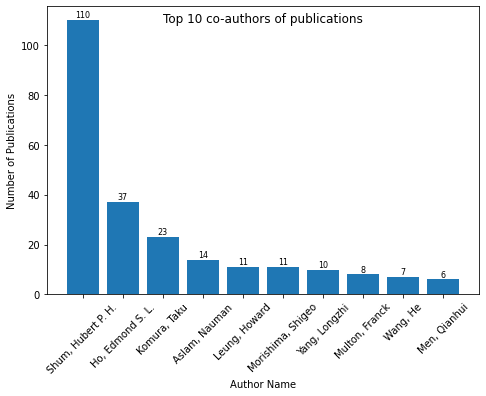

<Figure size 432x288 with 0 Axes>

In [9]:
#visualization
x = [i[0] for i in swd2][:10]
y = [i[1] for i in swd2][:10]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) 
fig.suptitle('Top 10 co-authors of publications') #title
plt.bar(x,y) #use bar chart which is the most suitable visualizations
plt.xticks(rotation=45) #make labels can be seen clearly
ax.set_xlabel('Author Name') #x-axis text
ax.set_ylabel('Number of Publications') #y-axis text
for a,b,i in zip(x,y,range(len(x))): 
    plt.text(a,b+1,y[i],ha='center',fontsize=8) # text the index on each column
plt.show()
plt.savefig("co-author.png")

Question 5 Please design and implement the solution to use data analysis and visualization for analysing
how the features of a publication would affect its “citation”.

In [10]:
#if the publication has a video, 1 as Yes, 0 as No
video =[]
for url in Filters:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    if soup.find("iframe")!= None:
        video.append(int(1)) #make the result to be intger
    else:
        video.append(int(0))

df['Video'] = video #add the new column to the data frame

print(df)

                                                 Title  \
0    Spatio-temporal Manifold Learning for Human Mo...   
1    A Quadruple Diffusion Convolutional Recurrent ...   
2    GAN-based Reactive Motion Synthesis with Class...   
3    A Generic Framework for Editing and Synthesizi...   
4    Automatic Sign Dance Synthesis from Gesture-ba...   
..                                                 ...   
105  Manifold Regularized Experimental Design for A...   
106  Discriminative Semantic Subspace Analysis for ...   
107  Experience-based Rule Base Generation and Adap...   
108  Towards Sparse Rule Base Generation for Fuzzy ...   
109               TSK Inference with Sparse Rule Bases   

                                              Abstract  \
0    Data-driven modeling of human motions is ubiqu...   
1    Recurrent neural network (RNN) has become popu...   
2    Creating realistic characters that can react t...   
3    Emotion is considered to be a core element in ...   
4    Automati

In [23]:
#build a new data frame for selected features
selected_columns = df[["Year","Authors","Type","Num_Pages","Publisher","Impact_Factor","Citation","Video"]]
Feature = selected_columns.copy()
splitAU = df['Authors'].str.split('and',5, expand=True) #split the name by word'and'
splitAU.columns = ["AU1", "AU2", "AU3", "AU4","AU5","AU6"] #rename the new column
Feature = pd.concat([Feature,splitAU], axis=1) #put the data frame together

In [17]:
print(Feature.describe())#Describe data
print(Feature.corr()) #corrlation between Continuous function features
Feature.sort_values(by=['Citation']) #sort the table by the number of citation

              Year  Impact_Factor    Citation       Video
count   110.000000     110.000000  110.000000  110.000000
mean   2016.554545       1.755073   17.254545    0.463636
std       4.035590       2.782971   30.982812    0.500958
min    2006.000000       0.000000    0.000000    0.000000
25%    2014.250000       0.000000    1.000000    0.000000
50%    2017.500000       0.000000    6.000000    0.000000
75%    2020.000000       2.757000   21.000000    1.000000
max    2021.000000      11.448000  212.000000    1.000000
                   Year  Impact_Factor  Citation     Video
Year           1.000000       0.169173 -0.290235 -0.164647
Impact_Factor  0.169173       1.000000  0.458991 -0.097996
Citation      -0.290235       0.458991  1.000000  0.180883
Video         -0.164647      -0.097996  0.180883  1.000000


,Year,Authors,Type,Num_Pages,Publisher,Impact_Factor,Citation,Video,AU1,AU2,AU3,AU4,AU5,AU6
39,2007,"Shum, Hubert P. H. and Komura, Taku and Nagano...",CONF,1,,0.000,0,1,"Shum, Hubert P. H.","Komura, Taku","Nagano, Akinori",None,None,None
21,2008,"Komura, Taku and Shum, Hubert P. H. and Ho, Ed...",CONF,10,SpringerVerlag,0.000,0,0,"Komura, Taku","Shum, Hubert P. H.","Ho, Edmond S. L.",None,None,None
87,2021,"Men, Qianhui and Shum, Hubert P. H.",JOUR,,Elsevier,0.000,0,0,"Men, Qianhui","Shum, Hubert P. H.",None,None,None,None
100,2020,"Hu, Yuan and Shum, Hubert P. H. and Ho, Edmond...",JOUR,10,Institution of Engineering and Technology,2.496,0,0,"Hu, Yuan","Shum, Hubert P. H.","Ho, Edmond S. L.",None,None,None
28,2019,"Hall, Jake and Chan, Jacky C. P. and Shum, Hub...",CONF,2,ACM,0.000,0,0,"Hall, Jake","Chan, Jacky C. P.","Shum, Hubert P. H.","Ho, Edmond S. L.",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2021,"Wang, He and Ho, Edmond S. L. and Shum, Hubert...",JOUR,12,IEEE,4.579,74,1,"Wang, He","Ho, Edmond S. L.","Shum, Hubert P. H.","Zhu, Zhanxing",None,None
96,2017,"Baig, Muhammad Zeeshan and Aslam, Nauman and S...",JOUR,12,Elsevier,6.954,80,0,"Baig, Muhammad Zeeshan","Aslam, Nauman","Shum, Hubert P. H.","Zhang, Li",None,None
19,2008,"Shum, Hubert P. H. and Komura, Taku and Shirai...",JOUR,8,ACM,5.414,125,1,"Shum, Hubert P. H.","Komura, Taku","Shiraishi, Masashi","Yamazaki, Shuntaro",None,None
33,2017,"Plantard, Pierre and Shum, Hubert P. H. and Pi...",JOUR,8,Elsevier,3.661,140,0,"Plantard, Pierre","Shum, Hubert P. H.","Pierres, Anne-Sophie Le","Multon, Franck",None,None


In [13]:
#save as a new csv file
Feature.to_csv("Feature.csv", encoding='utf-8', index=False)

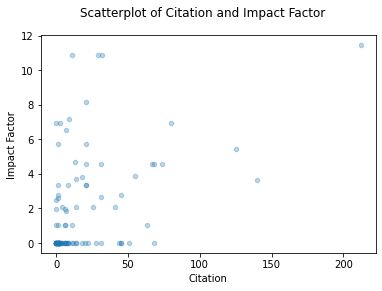

In [27]:
#Figure of Citation and Impact Factor
x1 = Feature["Citation"]
y1 = Feature["Impact_Factor"]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x1,y1,alpha=0.3, s=20)
fig.suptitle('Scatterplot of Citation and Impact Factor')#Title
ax.set_xlabel('Citation') #x-axis text
ax.set_ylabel('Impact Factor') #y-axis text
#plt.show()
plt.savefig("Scatterplot of Citation and Impact Factor.png")

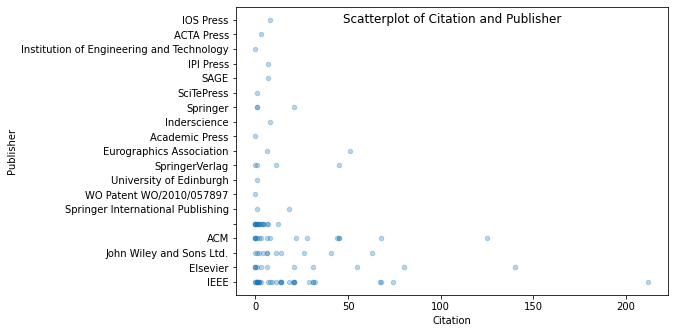

In [26]:
#Draft for Citation and Publisher
x2 = Feature["Citation"]
y2 = Feature["Publisher"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x2,y2,alpha=0.3, s=20)
fig.suptitle('Scatterplot of Citation and Publisher')#Title
ax.set_xlabel('Citation') #x-axis text
ax.set_ylabel('Publisher') #y-axis text
#plt.show()
plt.savefig("Scatterplot of Citation and Publisher.png")

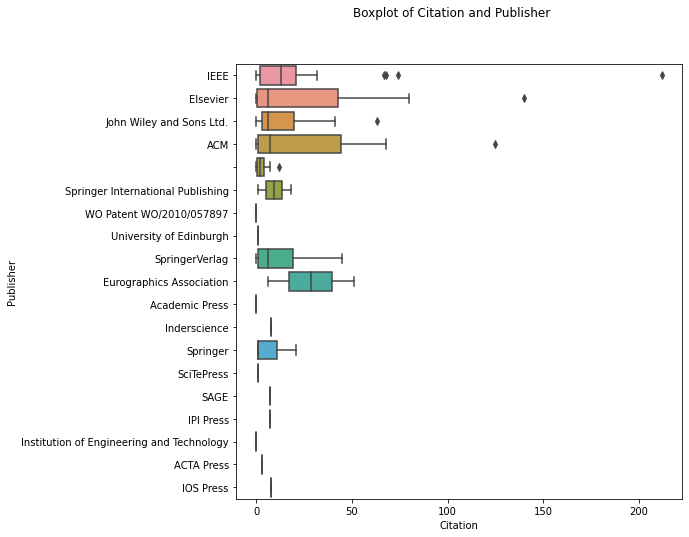

In [24]:
#Boxplot has a more clear version
fig = plt.figure(figsize=(8,8))
sns.boxplot(x="Citation", y="Publisher", data=Feature)
fig.suptitle('Boxplot of Citation and Publisher')#Title
ax.set_xlabel('Citation') #x-axis text
ax.set_ylabel('Publisher') #y-axis text
#plt.show()
plt.savefig("Boxplot of Citation and Publisher.png")

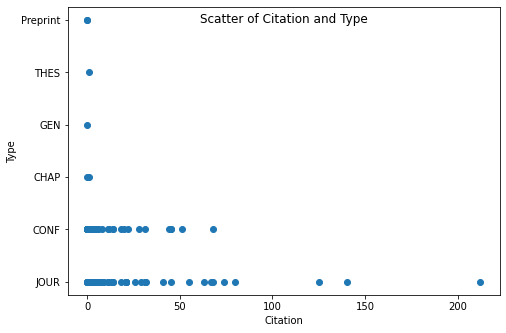

In [60]:
#Draft
x3 = Feature["Citation"]
y3 = Feature["Type"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.suptitle('Scatter of Citation and Type')#Title
ax.set_xlabel('Citation') #x-axis text
ax.set_ylabel('Type') #y-axis text
ax.scatter(x3,y3)

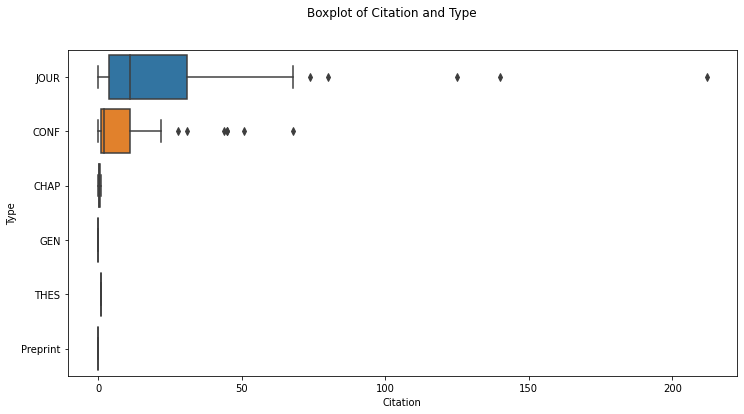

In [30]:
#Boxplot has a more clear version
fig = plt.figure(figsize=(12,6))
sns.boxplot(x="Citation", y="Type", data=Feature)
fig.suptitle('Boxplot of Citation and Type')#Title
ax.set_xlabel('Citation') #x-axis text
ax.set_ylabel('Type') #y-axis text
plt.savefig("Boxplot of Citation and Type.png")

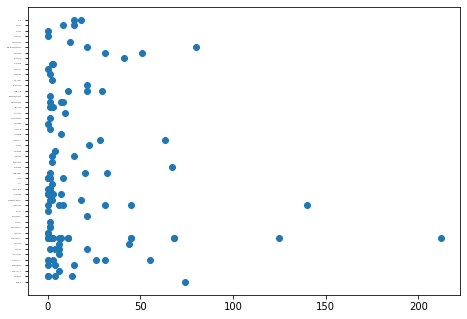

In [31]:
#Lead Author and average citation(Draft)
x4 = Feature["Citation"]
y4 = Feature["AU1"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x4,y4)
plt.yticks(fontsize=0.5)
plt.show()

In [59]:
#Linear Regression
X=Feature[["Year","Type","Publisher","Impact_Factor","Video"]]
X = pd.get_dummies(data=X, drop_first=True)
Y = Feature["Citation"]
cols = ["Year","Type","Publisher","Impact_Factor","Video"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101) #split the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train) #model building
print('intercept:', model.intercept_) #coeffient
print('slope:', model.coef_)
zip(cols,model.coef_)
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

(82, 26)
(28, 26)
(82,)
(28,)
intercept: 8644.296425711513
slope: [-4.29511849e+00  4.04899297e+00  1.23755192e+01  1.70000000e+01
 -7.10542736e-15  3.62839697e+01 -2.82887261e+01 -5.05412606e+00
  6.25914530e+00 -5.73615539e+00  2.75478143e+01 -3.59689405e+00
 -5.16642453e+01  2.60740092e+00 -7.36155385e-01 -4.84726226e+01
 -9.32639237e+00 -1.45473233e+01 -2.90012827e+01 -9.10532258e+00
 -8.88178420e-16 -1.92243295e+01  1.56624588e+01 -1.26743783e+01
 -5.05412606e+00  0.00000000e+00]


,Coefficient
Year,-4.295118e+00
Impact_Factor,4.048993e+00
Video,1.237552e+01
Type_CONF,1.700000e+01
Type_GEN,-7.105427e-15
Type_JOUR,3.628397e+01
Type_Preprint,-2.828873e+01
Type_THES,-5.054126e+00
Publisher_ACM,6.259145e+00
Publisher_ACTA Press,-5.736155e+00


In [52]:
y_pred = model.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred))

16.25107701681509


In [58]:
#Linear Regression Model2  To test weather the number of feature effect the accuracy
X=Feature[["Type"]]
X = pd.get_dummies(data=X, drop_first=True)
Y = Feature["Citation"]
cols2 = ["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=19)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model2 = LinearRegression()
model2.fit(X_train,y_train)
print('intercept:', model2.intercept_)
print('slope:', model2.coef_)
zip(cols2,model2.coef_)
y_pred = model2.predict(X_test)
print(metrics.mean_absolute_error(y_test,y_pred))

(82, 5)
(28, 5)
(82,)
(28,)
intercept: 1.4210854715202004e-14
slope: [9.83333333e+00 0.00000000e+00 3.08108108e+01 9.88098492e-15
 1.00000000e+00]
16.022522522522525
